In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text,plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay,accuracy_score

In [2]:
fruits = pd.read_csv('/Users/DRepani/Documents/Datasets/fruits.csv')
X = fruits[['sphericity', 'weight']]
y = fruits['label']

### Prepare the data split between classes.

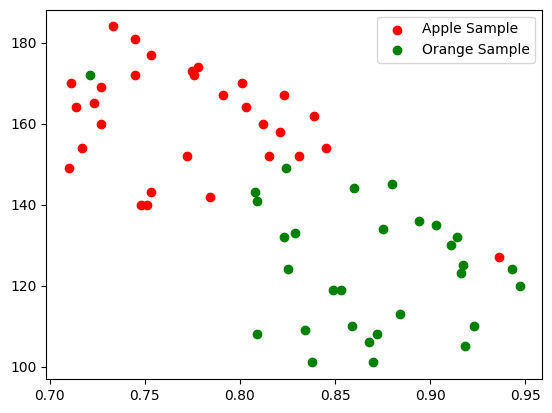

In [8]:
plt.scatter(x='sphericity', y='weight', data=fruits[y=='Apple'],c='red',label='Apple Sample' )
plt.scatter(x='sphericity', y='weight', data=fruits[y=='Orange'],c='green', label='Orange Sample')
plt.legend()
plt.show()

- In above observations , we have found the noice in the dataset.   one of the orange in apple data and one of apple in orange dataset. its liitle difficult to separate the data.

- If the above mentioned two errored sample if its there in testing sample then won't be any issues.Problems comes when it comes to training sample.




### Train the data 

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=10)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45, 2), (15, 2), (45,), (15,))

### Training Sample and Testing Sample

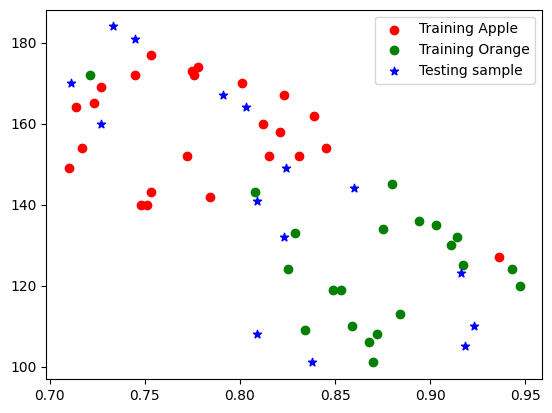

In [14]:
plt.scatter(x='sphericity', y='weight', data=X_train[y_train=='Apple'],c='red',label='Training Apple' )
plt.scatter(x='sphericity', y='weight', data=X_train[y_train=='Orange'],c='green', label='Training Orange')
plt.scatter(x='sphericity', y='weight', data=X_test, c='blue', marker='*', label = 'Testing sample')
plt.legend()
plt.show()

- Boundaries wont change if the two samples in testing samples 

In [40]:
model = DecisionTreeClassifier(criterion='entropy', max_depth=2)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.9333333333333333, 0.8)

In [41]:
model.get_depth(), model.get_n_leaves()


(2, np.int64(4))

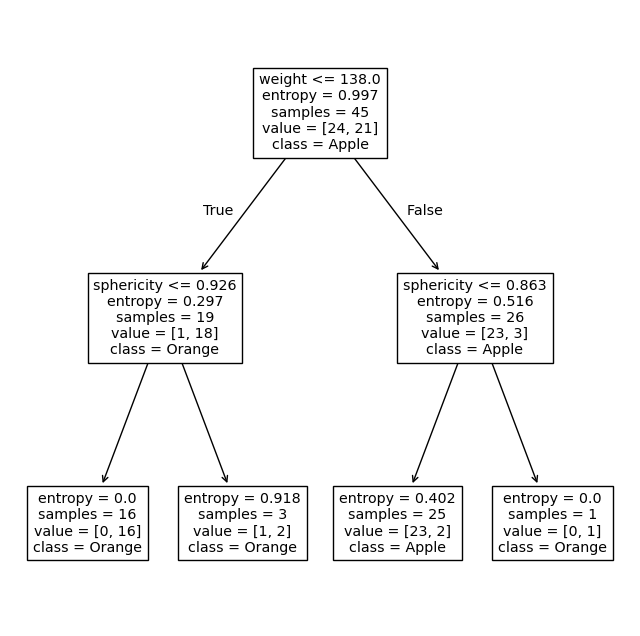

In [42]:
plt.figure(figsize=(8,8))

plot_tree(model, feature_names=X.columns, class_names=model.classes_)
plt.show()

### ConfusionMatrix calculation:

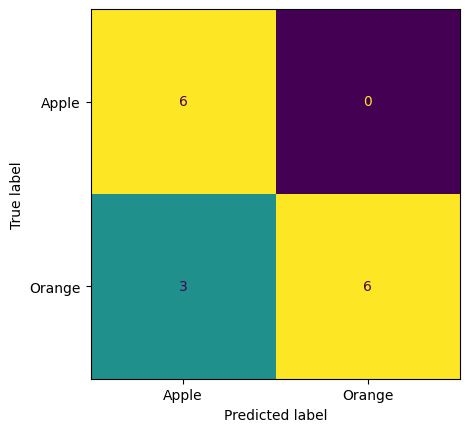

In [44]:
ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, colorbar=False)
plt.show()